In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"D:\PythonProjects\UsedCarsAnalis\used_cars_UK.csv")
data.head()

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [4]:
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(data.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3685 entries, 0 to 3684
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3685 non-null   int64  
 1   title              3685 non-null   object 
 2   Price              3685 non-null   int64  
 3   Mileage(miles)     3685 non-null   int64  
 4   Registration_Year  3685 non-null   int64  
 5   Previous Owners    2276 non-null   float64
 6   Fuel type          3685 non-null   object 
 7   Body type          3685 non-null   object 
 8   Engine             3640 non-null   object 
 9   Gearbox            3685 non-null   object 
 10  Doors              3660 non-null   float64
 11  Seats              3650 non-null   float64
 12  Emission Class     3598 non-null   object 
 13  Service history    540 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 403.2+ KB
None

First 5 rows of the dataset:
   Unnamed: 

In [5]:
# Handle missing values (replace NaN with appropriate values)
data['Previous Owners'].fillna(0, inplace=True)
data['Service history'].fillna('Unknown', inplace=True)


In [6]:
# Calculate the average price of cars
average_price = data['Price'].mean()
print("\nAverage Price of Cars: ${:.2f}".format(average_price))



Average Price of Cars: $5787.15


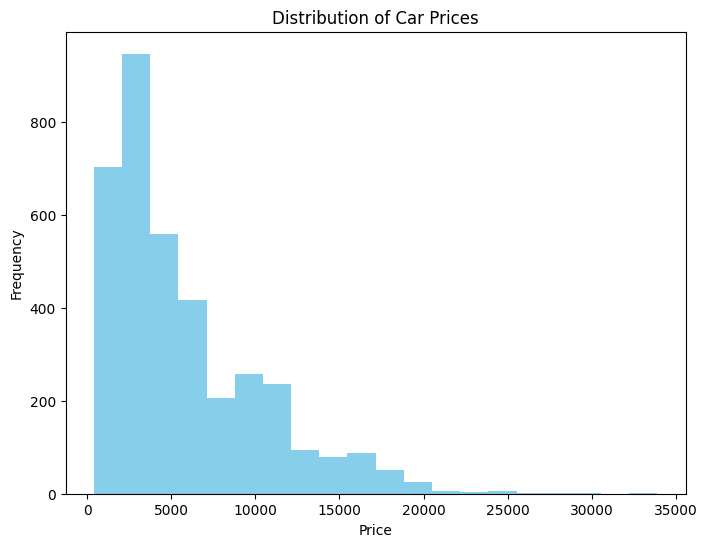

In [7]:
# Create a histogram of car prices
plt.figure(figsize=(8, 6))
plt.hist(data['Price'], bins=20, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


### Price Distribution:

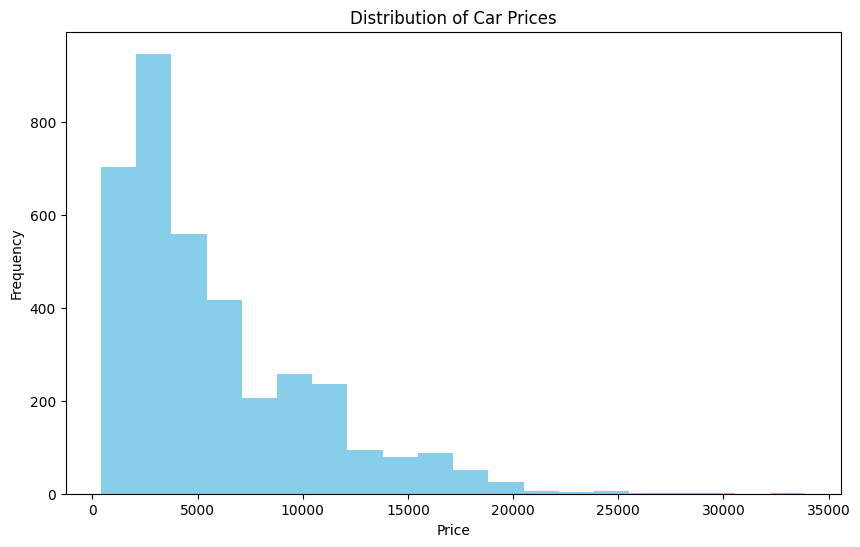

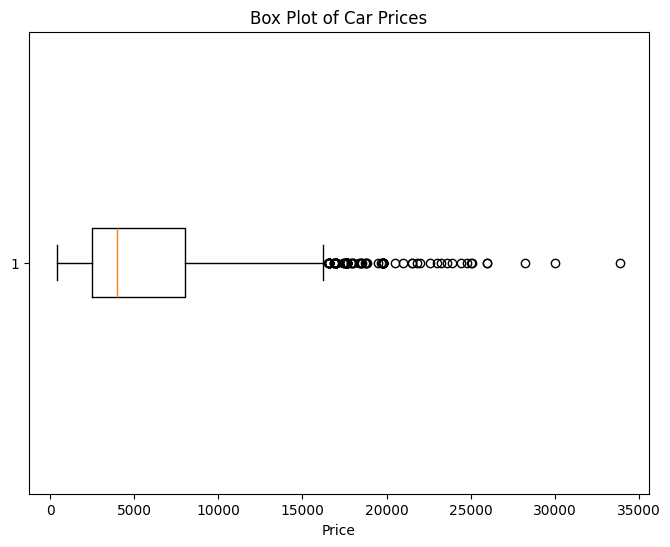

In [8]:
# Create a histogram to visualize the price distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Price'], bins=20, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Create a box plot to identify price outliers
plt.figure(figsize=(8, 6))
plt.boxplot(data['Price'], vert=False)
plt.title('Box Plot of Car Prices')
plt.xlabel('Price')
plt.show()

### Mileage Analysis: 

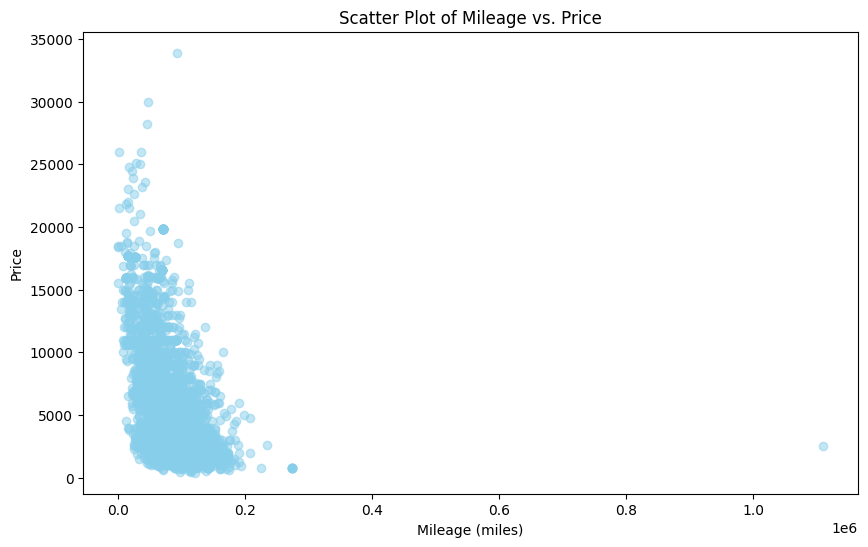

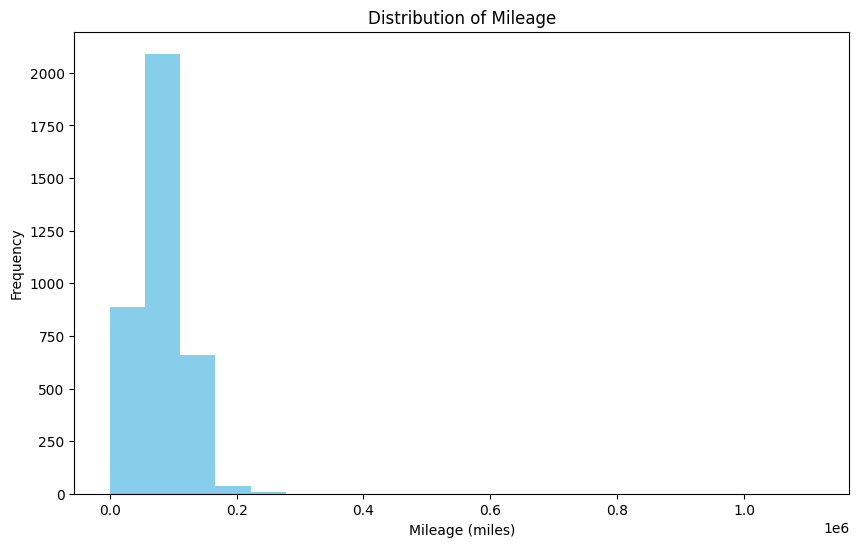

In [9]:
# Create a scatter plot to visualize the relationship between mileage and price
plt.figure(figsize=(10, 6))
plt.scatter(data['Mileage(miles)'], data['Price'], color='skyblue', alpha=0.5)
plt.title('Scatter Plot of Mileage vs. Price')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price')
plt.show()

# Create a histogram to visualize the distribution of mileage
plt.figure(figsize=(10, 6))
plt.hist(data['Mileage(miles)'], bins=20, color='skyblue')
plt.title('Distribution of Mileage')
plt.xlabel('Mileage (miles)')
plt.ylabel('Frequency')
plt.show()


### Registration Year:

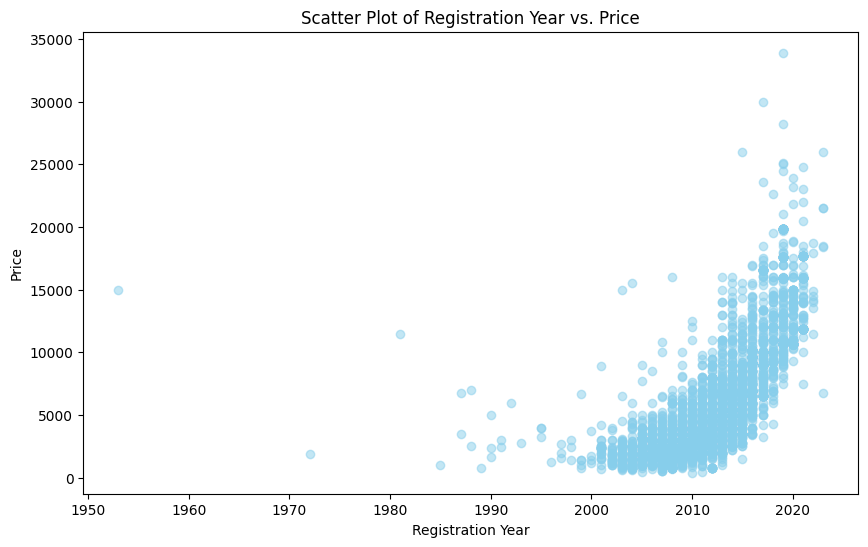

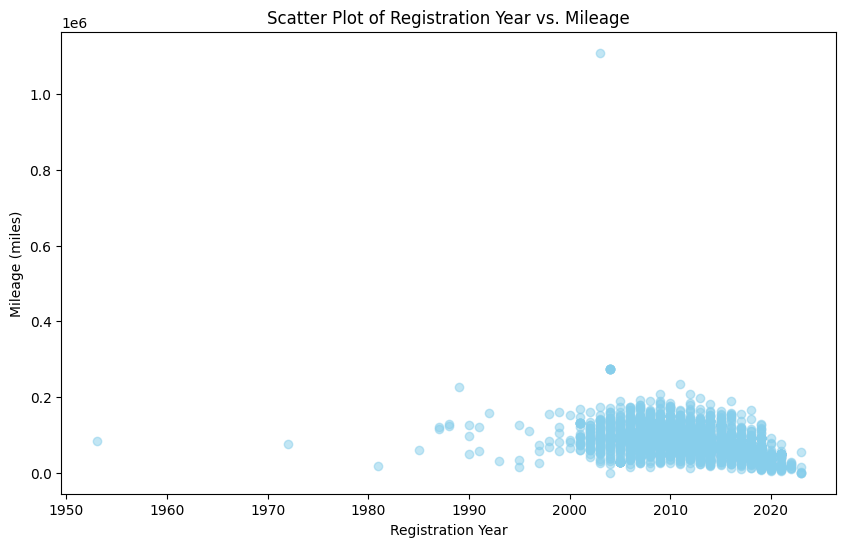

In [10]:
# Scatter plot to visualize the relationship between registration year and price
plt.figure(figsize=(10, 6))
plt.scatter(data['Registration_Year'], data['Price'], color='skyblue', alpha=0.5)
plt.title('Scatter Plot of Registration Year vs. Price')
plt.xlabel('Registration Year')
plt.ylabel('Price')
plt.show()

# Scatter plot to visualize the relationship between registration year and mileage
plt.figure(figsize=(10, 6))
plt.scatter(data['Registration_Year'], data['Mileage(miles)'], color='skyblue', alpha=0.5)
plt.title('Scatter Plot of Registration Year vs. Mileage')
plt.xlabel('Registration Year')
plt.ylabel('Mileage (miles)')
plt.show()


In [11]:
# Calculate correlation between registration year and price
price_year_corr = data['Registration_Year'].corr(data['Price'])

# Calculate correlation between registration year and mileage
mileage_year_corr = data['Registration_Year'].corr(data['Mileage(miles)'])

print(f"Correlation between Registration Year and Price: {price_year_corr:.2f}")
print(f"Correlation between Registration Year and Mileage: {mileage_year_corr:.2f}")


Correlation between Registration Year and Price: 0.72
Correlation between Registration Year and Mileage: -0.42


### Fuel Type and Price: 

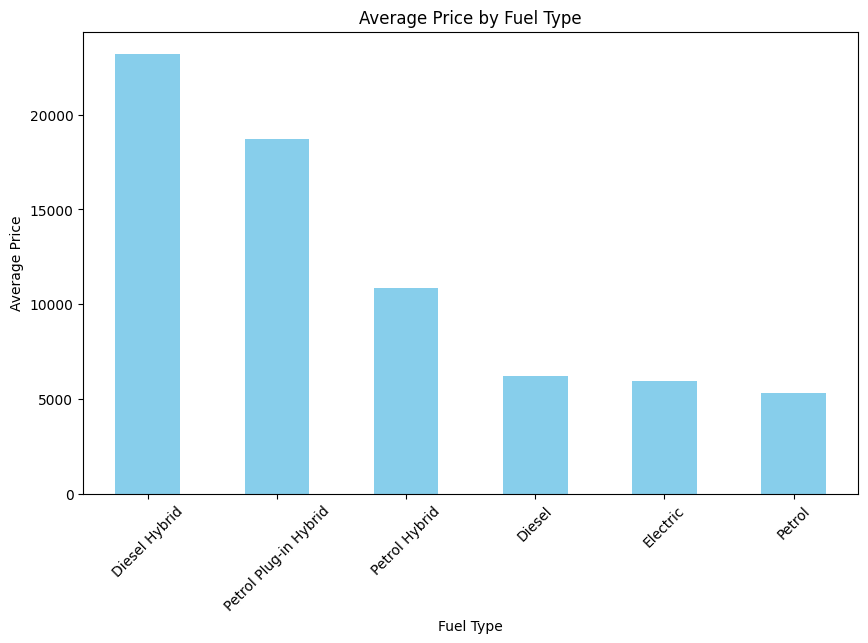

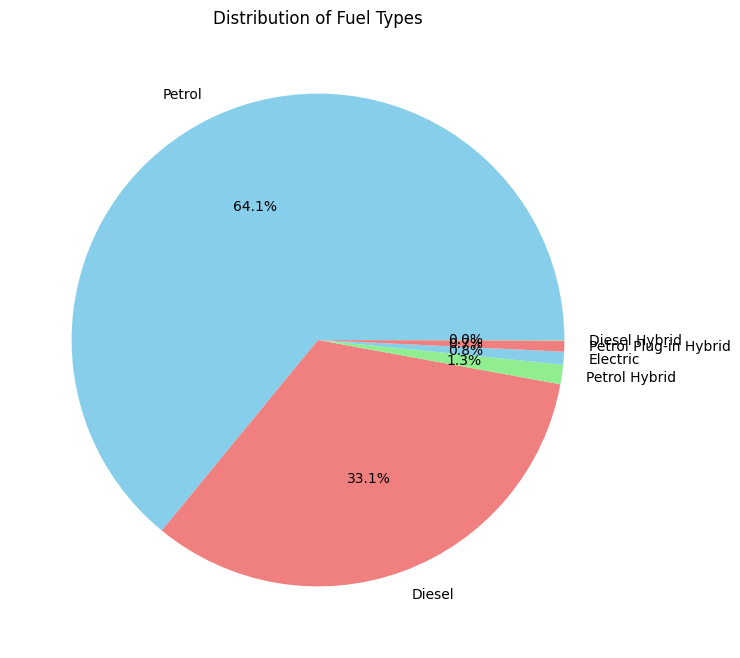

In [12]:
# Create a bar chart to compare average prices by fuel type
average_price_by_fuel = data.groupby('Fuel type')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_price_by_fuel.plot(kind='bar', color='skyblue')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# Create a pie chart to visualize the distribution of fuel types
fuel_type_counts = data['Fuel type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Fuel Types')
plt.show()


### Body Type and Price

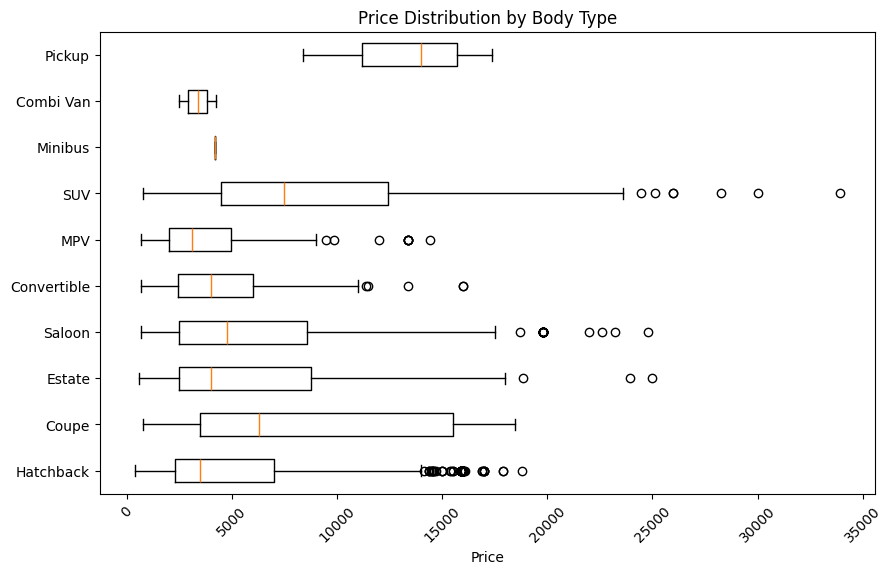

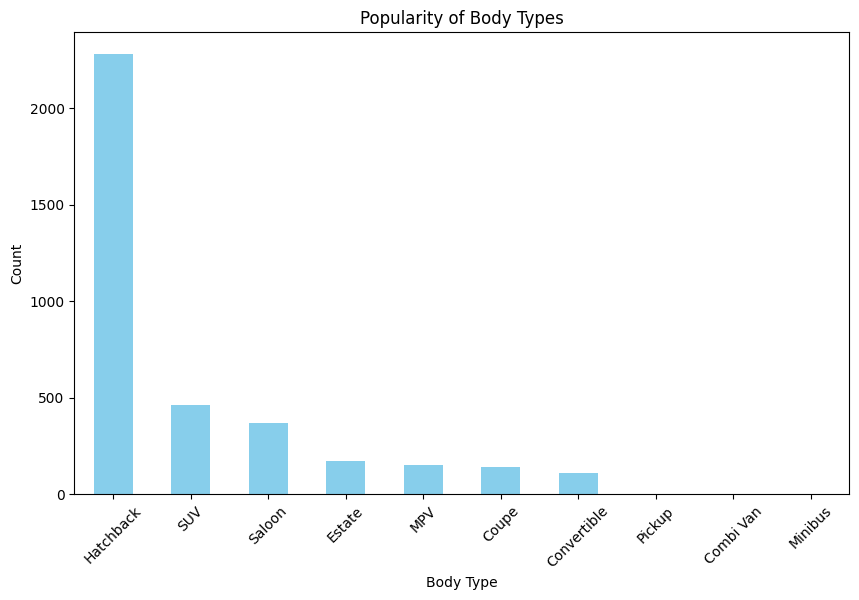

In [13]:
# Create a box plot to compare prices by body type
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.boxplot([data[data['Body type'] == body_type]['Price'] for body_type in data['Body type'].unique()], vert=False)
plt.title('Price Distribution by Body Type')
plt.xlabel('Price')
plt.yticks(range(1, len(data['Body type'].unique()) + 1), data['Body type'].unique())
plt.show()

# Create a bar chart to visualize the popularity of each body type
body_type_counts = data['Body type'].value_counts()

plt.figure(figsize=(10, 6))
body_type_counts.plot(kind='bar', color='skyblue')
plt.title('Popularity of Body Types')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Engine Size and Price

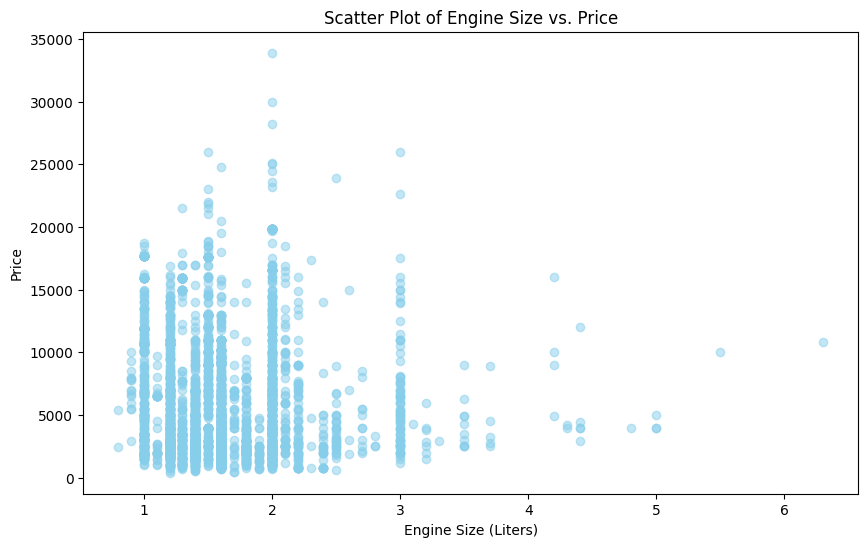

Correlation between Engine Size and Price: -0.02


In [15]:
# Convert 'Engine' column to a numeric data type (assuming the column contains strings)
data['Engine'] = data['Engine'].str.rstrip('L').astype(float)

# Create a scatter plot to visualize the relationship between engine size and price
plt.figure(figsize=(10, 6))
plt.scatter(data['Engine'], data['Price'], color='skyblue', alpha=0.5)
plt.title('Scatter Plot of Engine Size vs. Price')
plt.xlabel('Engine Size (Liters)')
plt.ylabel('Price')
plt.show()

# Calculate the correlation between engine size and price
engine_price_corr = data['Engine'].corr(data['Price'])
print(f"Correlation between Engine Size and Price: {engine_price_corr:.2f}")


### Gearbox Type

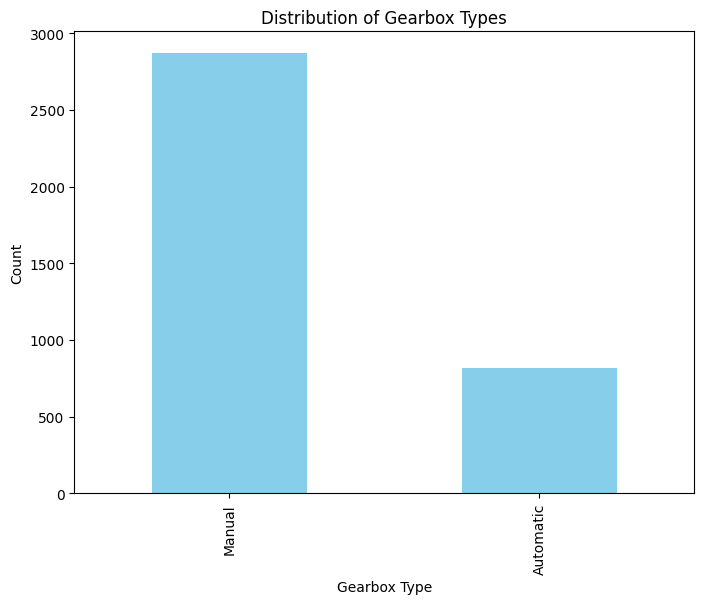

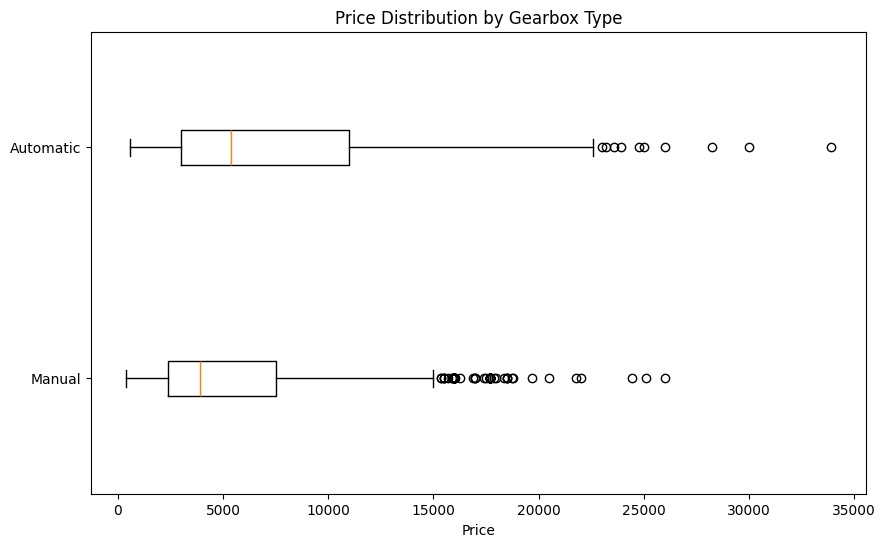

In [16]:
# Create a bar chart to visualize the distribution of gearbox types
gearbox_counts = data['Gearbox'].value_counts()

plt.figure(figsize=(8, 6))
gearbox_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Gearbox Types')
plt.xlabel('Gearbox Type')
plt.ylabel('Count')
plt.show()

# Create box plots to compare prices by gearbox type
manual_prices = data[data['Gearbox'] == 'Manual']['Price']
automatic_prices = data[data['Gearbox'] == 'Automatic']['Price']

plt.figure(figsize=(10, 6))
plt.boxplot([manual_prices, automatic_prices], labels=['Manual', 'Automatic'], vert=False)
plt.title('Price Distribution by Gearbox Type')
plt.xlabel('Price')
plt.show()


### Number of Doors and Seats

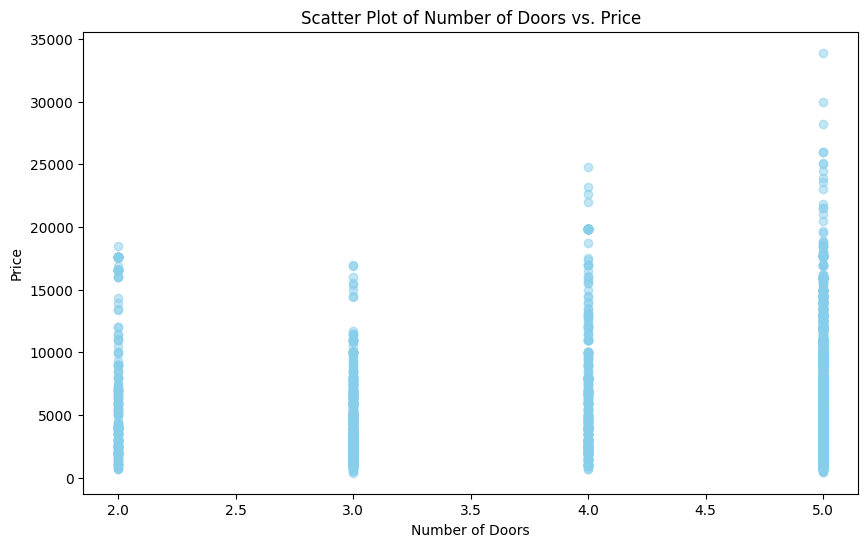

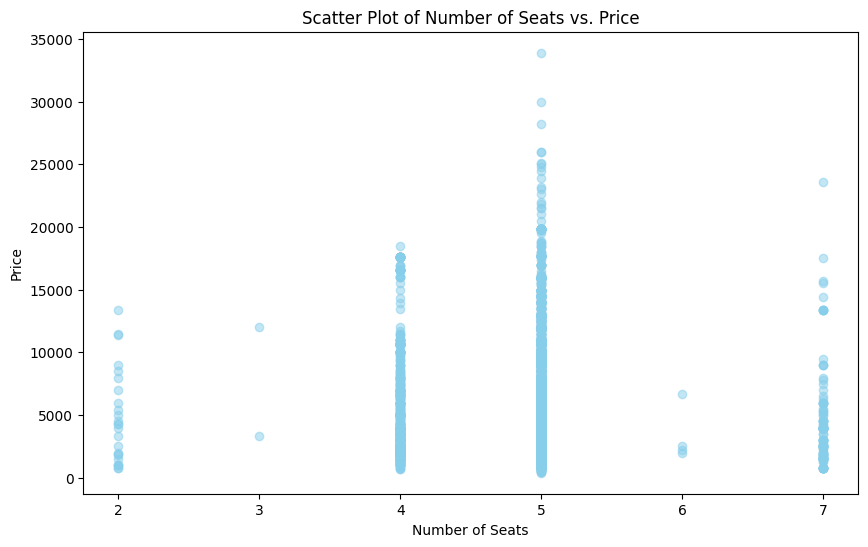

In [19]:
# Create a scatter plot to visualize the relationship between the number of doors and price
plt.figure(figsize=(10, 6))
plt.scatter(data['Doors'], data['Price'], color='skyblue', alpha=0.5)
plt.title('Scatter Plot of Number of Doors vs. Price')
plt.xlabel('Number of Doors')
plt.ylabel('Price')
plt.show()

# Create a scatter plot to visualize the relationship between the number of seats and price
plt.figure(figsize=(10, 6))
plt.scatter(data['Seats'], data['Price'], color='skyblue', alpha=0.5)
plt.title('Scatter Plot of Number of Seats vs. Price')
plt.xlabel('Number of Seats')
plt.ylabel('Price')
plt.show()


### Emission Class:

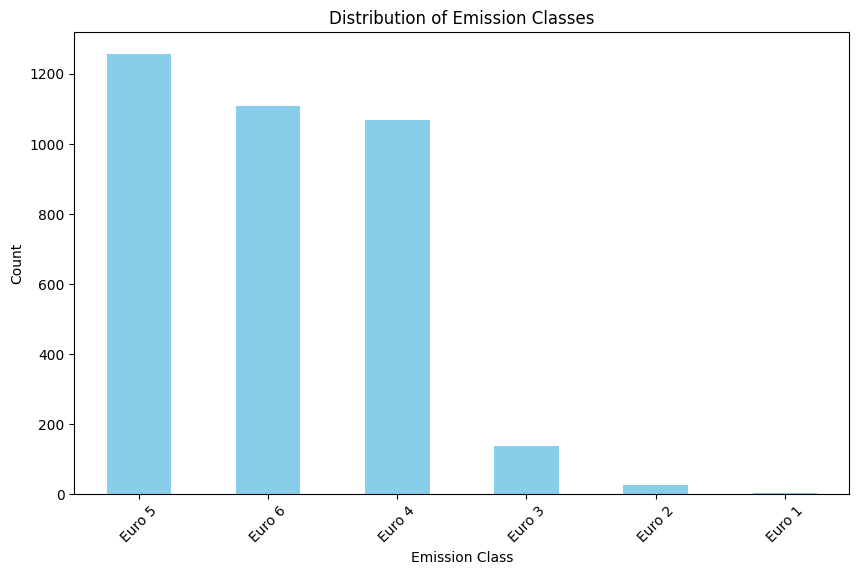

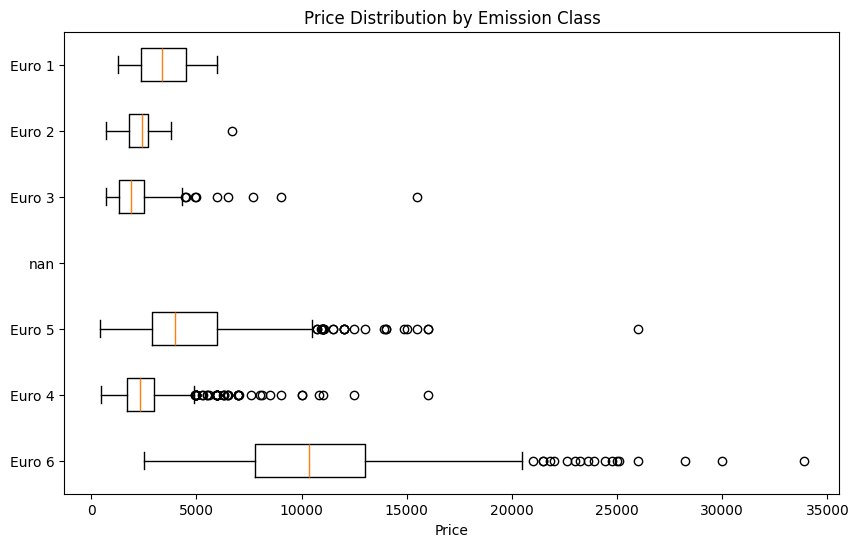

In [21]:
# Create a bar chart to visualize the distribution of emission classes
emission_class_counts = data['Emission Class'].value_counts()

plt.figure(figsize=(10, 6))
emission_class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emission Classes')
plt.xlabel('Emission Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Create a box plot to compare prices by emission class
emission_classes = data['Emission Class'].unique()
price_by_emission = [data[data['Emission Class'] == emission_class]['Price'] for emission_class in emission_classes]

plt.figure(figsize=(10, 6))
plt.boxplot(price_by_emission, labels=emission_classes, vert=False)
plt.title('Price Distribution by Emission Class')
plt.xlabel('Price')
plt.show()


### Service History: 

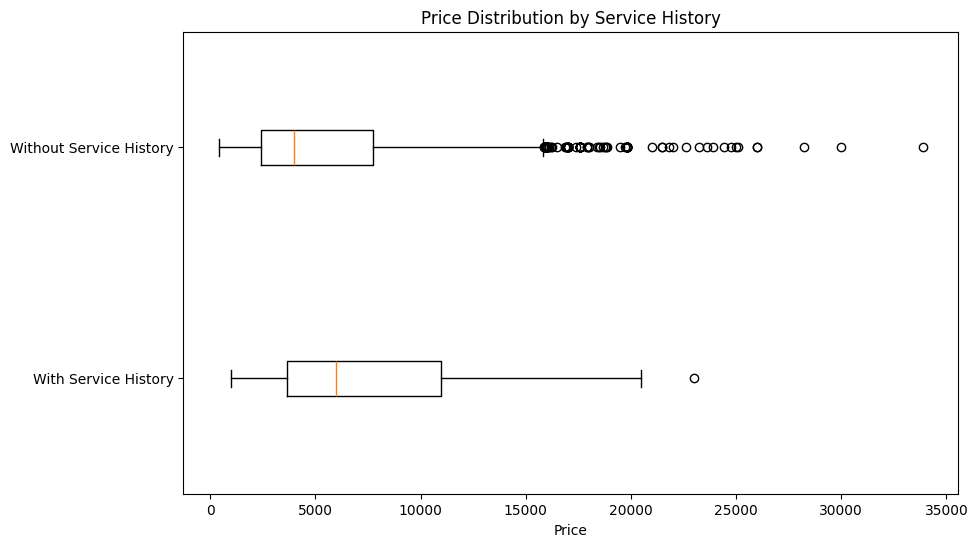

In [22]:
# Create a box plot to compare prices based on the presence or absence of service history
with_service_history = data[data['Service history'] == 'Full']['Price']
without_service_history = data[data['Service history'] == 'Unknown']['Price']

plt.figure(figsize=(10, 6))
plt.boxplot([with_service_history, without_service_history], labels=['With Service History', 'Without Service History'], vert=False)
plt.title('Price Distribution by Service History')
plt.xlabel('Price')
plt.show()


### Popular Car Models: 

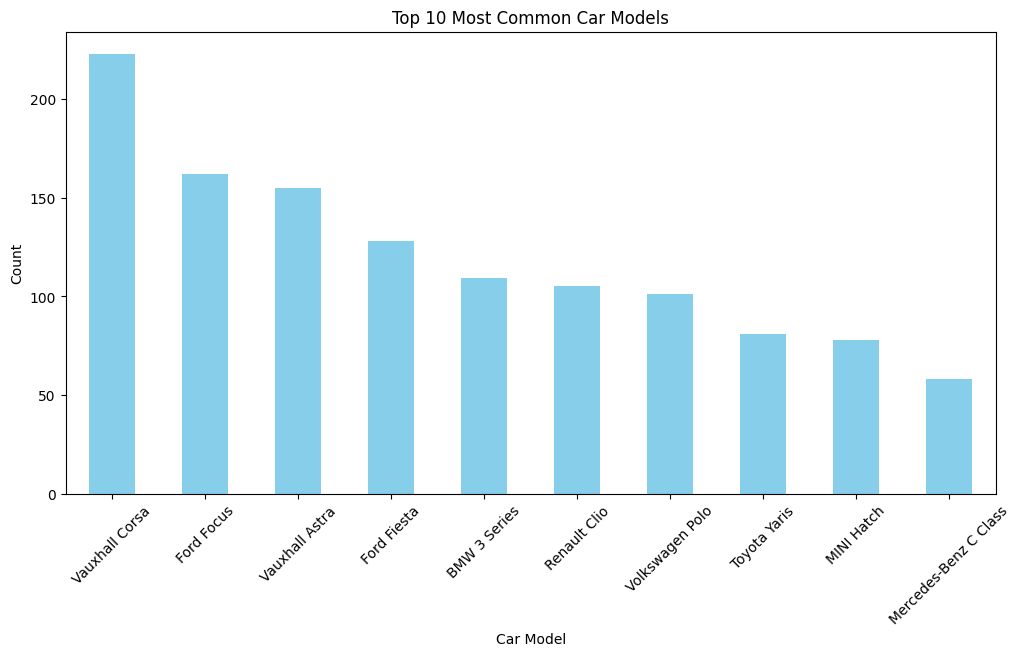

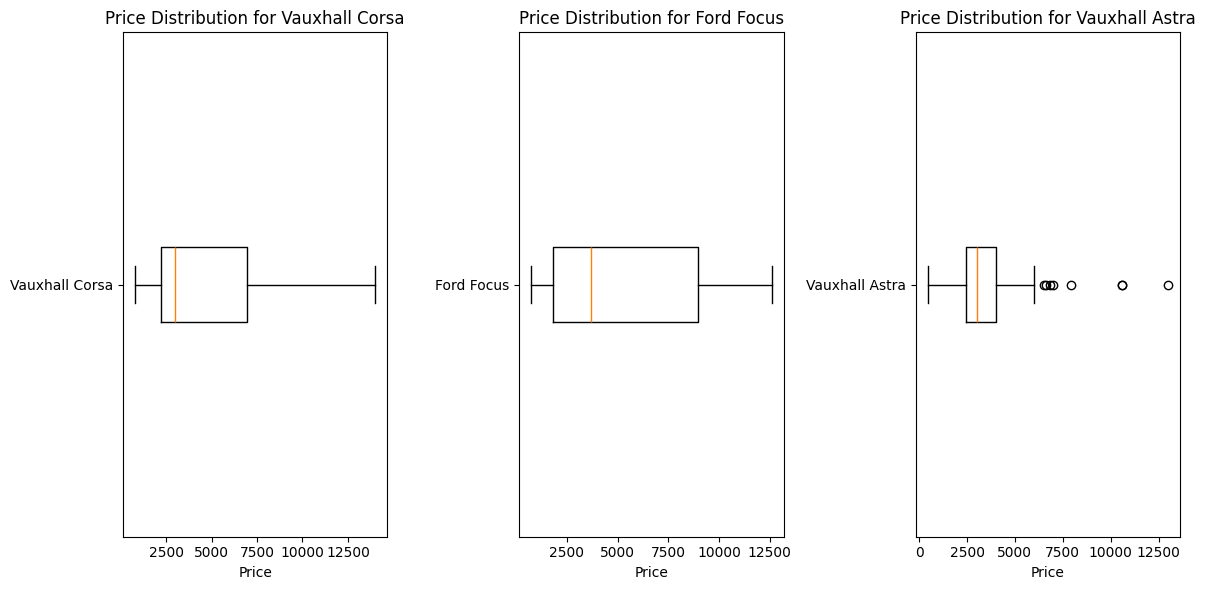

In [24]:
# Get the most common car models and their respective counts
top_car_models = data['title'].value_counts().head(10)

# Create a bar chart to visualize the most common car models
plt.figure(figsize=(12, 6))
top_car_models.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Car Models')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Create separate box plots for the top 3 most common car models
top3_models = top_car_models.index[:3]

plt.figure(figsize=(12, 6))
for i, model in enumerate(top3_models, 1):
    plt.subplot(1, 3, i)
    model_prices = data[data['title'] == model]['Price']
    plt.boxplot(model_prices, labels=[model], vert=False)
    plt.title(f'Price Distribution for {model}')
    plt.xlabel('Price')

plt.tight_layout()
plt.show()


### Correlation Analysis: 

Correlation Matrix:
                      Price  Mileage(miles)  Registration_Year
Price              1.000000       -0.500158           0.723880
Mileage(miles)    -0.500158        1.000000          -0.417029
Registration_Year  0.723880       -0.417029           1.000000


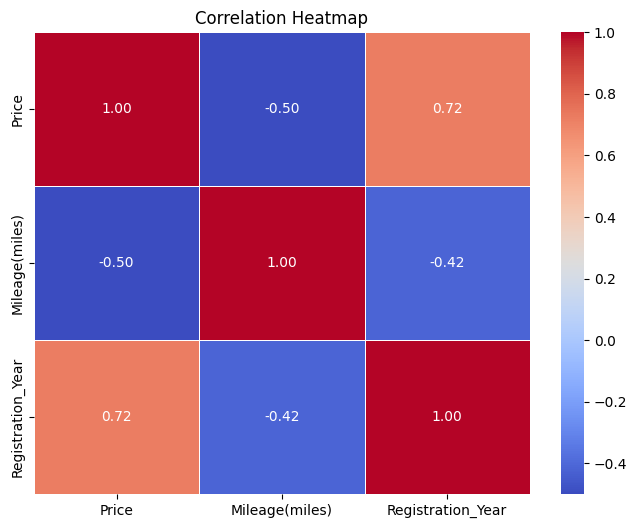

In [25]:
# Select the numeric columns for correlation analysis
numeric_columns = ['Price', 'Mileage(miles)', 'Registration_Year']

# Calculate the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# You can also create a heatmap for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### Previous Owners: 

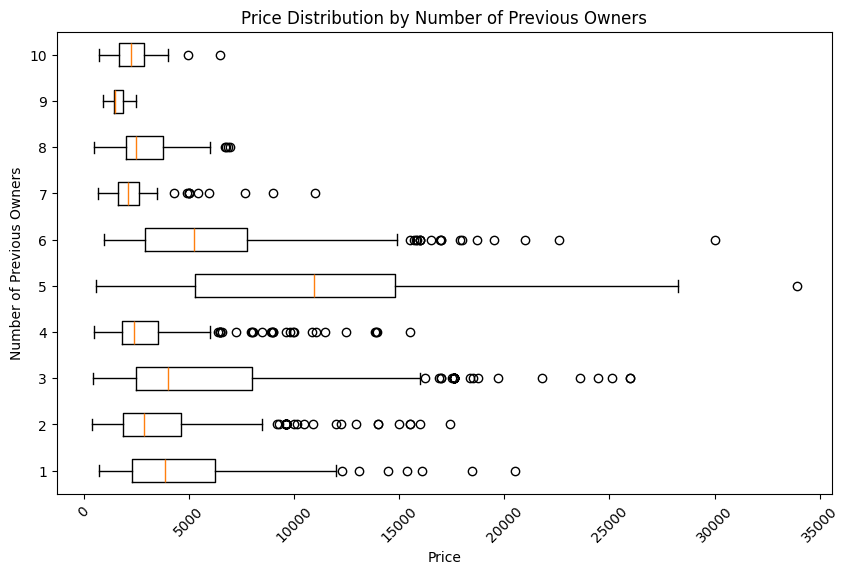

In [26]:
# Create a box plot to compare prices by the number of previous owners
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45)
plt.boxplot([data[data['Previous Owners'] == i]['Price'] for i in data['Previous Owners'].unique()], vert=False)
plt.title('Price Distribution by Number of Previous Owners')
plt.xlabel('Price')
plt.ylabel('Number of Previous Owners')
plt.show()


### Combining Factors:

In [28]:
import statsmodels.api as sm


# Select the variables for the regression analysis
X = data[['Registration_Year', 'Mileage(miles)']]
y = data['Price']

# Add a constant to the independent variables (intercept)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     2456.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:31:49   Log-Likelihood:                -34648.
No. Observations:                3685   AIC:                         6.930e+04
Df Residuals:                    3682   BIC:                         6.932e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.096e+06   2.11e+0

### Time Trends: 

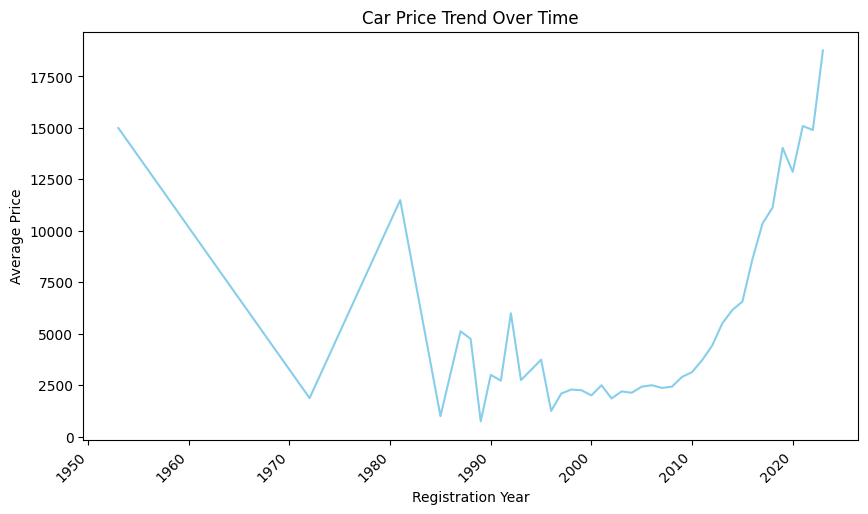

In [32]:
# Convert 'Registration_Year' to a datetime format
data['Registration_Year'] = pd.to_datetime(data['Registration_Year'], format='%Y')

# Create a line chart to visualize the trend of car prices over time
plt.figure(figsize=(10, 6))
data.groupby('Registration_Year')['Price'].mean().plot(color='skyblue')
plt.title('Car Price Trend Over Time')
plt.xlabel('Registration Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()
